In [60]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
# load the data
data = pd.read_csv('/content/TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


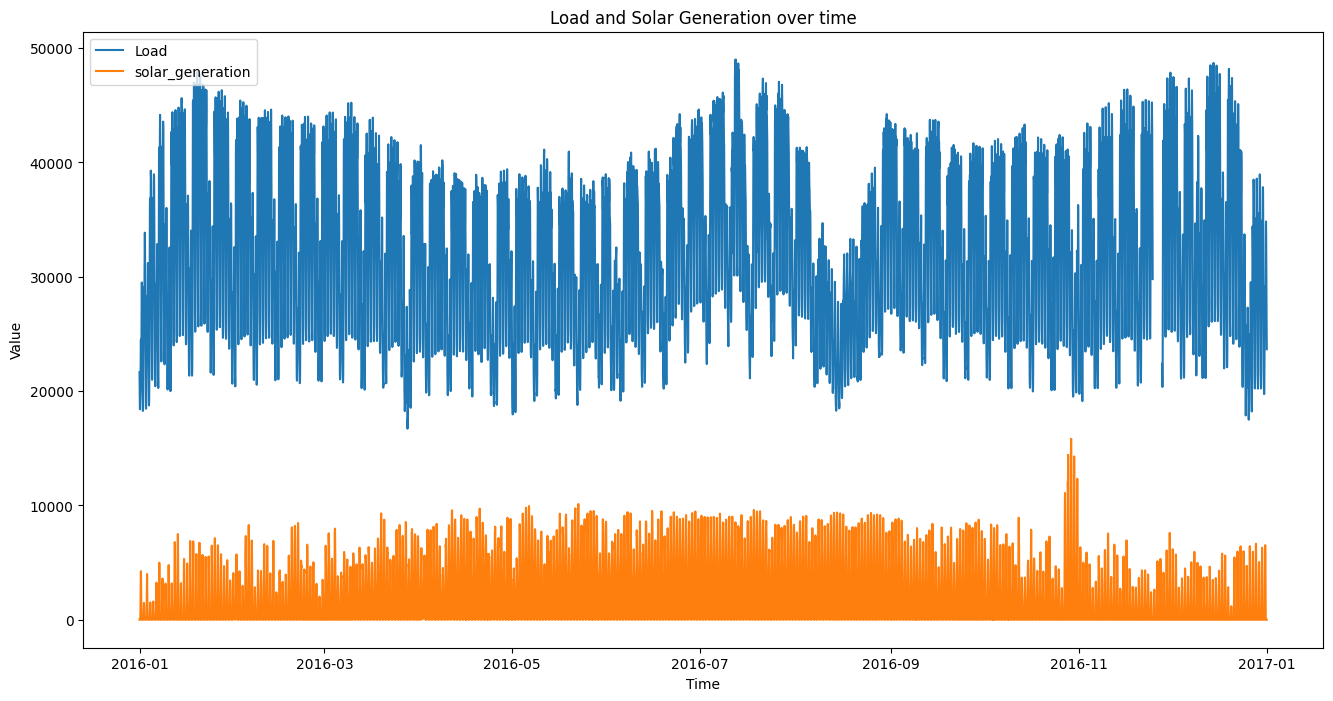

In [62]:
# Getting the Datetime Index
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])

# Plotting
plt.figure(figsize=(16,8))
plt.plot(data['utc_timestamp'],data['IT_load_new'],label = 'Load')
plt.plot(data['utc_timestamp'],data['IT_solar_generation'],label = 'solar_generation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Load and Solar Generation over time')
plt.legend()
plt.show()

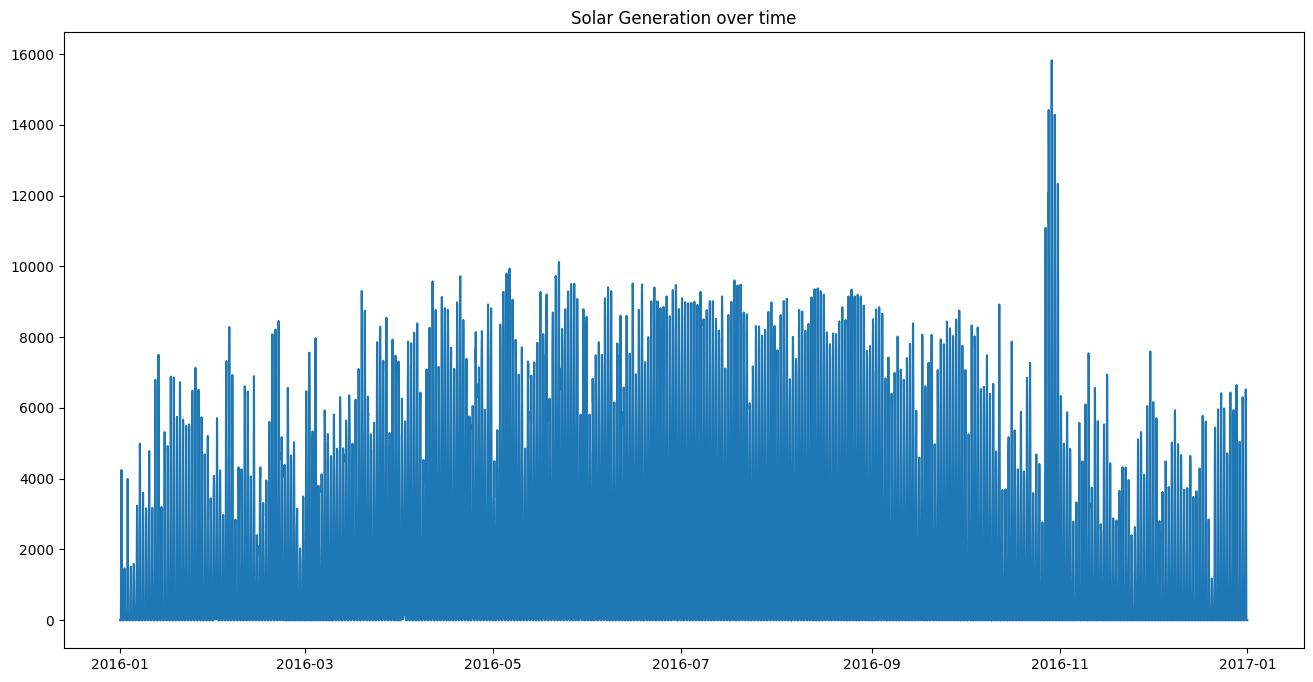

In [63]:
# Plotting
plt.figure(figsize=(16,8))
plt.plot(data['utc_timestamp'],data['IT_solar_generation'],label = 'solar_generation')
plt.title('Solar Generation over time')
plt.show()

In [64]:
# Range of values of IT Solar Generation
print(max(data['IT_solar_generation'])-min(data['IT_solar_generation']))

15824


In [65]:
'''
The above plots show the load and solar generation over time for the year 2016
'''

'\nThe above plots show the load and solar generation over time for the year 2016\n'

In [66]:
# Data Cleaning
# Checking the NULL values
data.isnull().sum()

,0
utc_timestamp,0
IT_load_new,72
IT_solar_generation,0


In [67]:
# Forward filling the Null Values
data['IT_load_new'].fillna(method='ffill',inplace=True)


In [68]:
# Checking the Null values
data.isnull().sum()

,0
utc_timestamp,0
IT_load_new,0
IT_solar_generation,0


In [69]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-fuller test
def adf_test(timeseries):

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)


In [70]:
# Driver code
print ('ADF test for "IT_load_new" after filling missing values:')
adf_test(data['IT_load_new'])

print ('ADF test for "IT_solar_generation" after filling missing values:')
adf_test(data['IT_solar_generation'])

ADF test for "IT_load_new" after filling missing values:
Results of Dickey-Fuller Test:
Test Statistic                -1.197390e+01
p-value                        3.841445e-22
#Lags Used                     3.700000e+01
Number of Observations Used    8.746000e+03
Critical Value (1%)           -3.431098e+00
dtype: float64
Test Statistic                -1.197390e+01
p-value                        3.841445e-22
#Lags Used                     3.700000e+01
Number of Observations Used    8.746000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861871e+00
dtype: float64
Test Statistic                -1.197390e+01
p-value                        3.841445e-22
#Lags Used                     3.700000e+01
Number of Observations Used    8.746000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861871e+00
Critical Value (10%)          -2.566946e+00
dtype: float64
ADF test for "IT_solar_generation" after filling missing values:
Results of

In [71]:
'''
what can be inferred from the above test: pvalue <=0.05, we can conclude that time series is not stationary

'''

'\nwhat can be inferred from the above test: pvalue <=0.05, we can conclude that time series is not stationary\n\n'

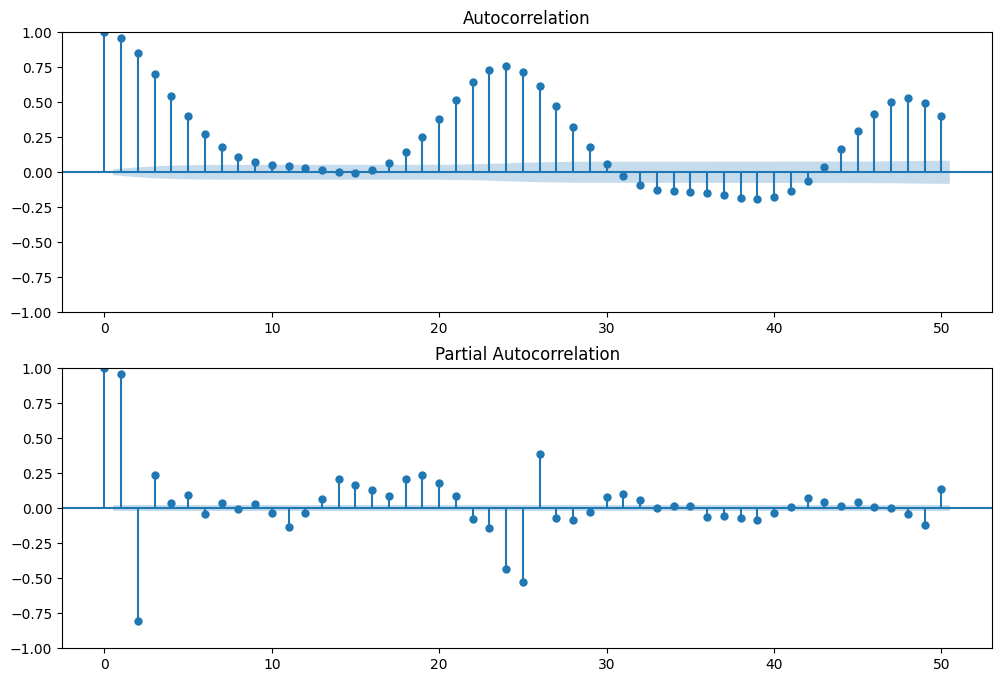

In [72]:
# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(data['IT_load_new'],lags=50, ax=ax1)
plot_pacf(data['IT_load_new'],lags=50, ax=ax2)
plt.show()

In [73]:
# We get the value of p from PACF plot and we get the value of q from ACF plot
# As we can see significant spikes occur upto lag2 and then they are dropping in PACF. Hence p=2
# As we can see there is no sharp cut but there is a seasonal cyclic pattern indicating that we take q =1

In [74]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# Split the data into  training and testing
train_size = int(len(data)*0.8)
train, test = data['IT_load_new'][:train_size], data['IT_load_new'][train_size:]

# Fit the ARIMA Model
model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

# Make Predictions on the test data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# ✅ Calculate MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100
print('Test MAPE: %.2f%%' % mape)


Test RMSE: 7714.952
Test MAPE: 21.71%


In [75]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# Split the data into  training and testing
train_size = int(len(data)*0.8)
train, test = data['IT_load_new'][:train_size], data['IT_load_new'][train_size:]

# Fit the ARIMA Model
model2 = ARIMA(train, order=(2, 1, 2))
model2_fit = model2.fit()

# Make Predictions on the test data
predictions = model2_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# ✅ Calculate MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100
print('Test MAPE: %.2f%%' % mape)

Test RMSE: 7993.849
Test MAPE: 24.54%


In [76]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# Split the data into  training and testing
train_size = int(len(data)*0.8)
train, test = data['IT_load_new'][:train_size], data['IT_load_new'][train_size:]

# Fit the ARIMA Model
model3 = ARIMA(train, order=(2, 2, 2))
model3_fit = model3.fit()

# Make Predictions on the test data
predictions = model3_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# ✅ Calculate MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100
print('Test MAPE: %.2f%%' % mape)

Test RMSE: 9290.389
Test MAPE: 29.12%


In [77]:
# SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into  training and testing
train_size = int(len(data)*0.8)
train, test = data['IT_load_new'][:train_size], data['IT_load_new'][train_size:]

# Fit the SARIMA
model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(2, 1, 2, 12))
model_fit = model.fit()

# Make Predictions on the test data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# ✅ Calculate MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100
print('Test MAPE: %.2f%%' % mape)

Test RMSE: 7179.339
Test MAPE: 20.23%


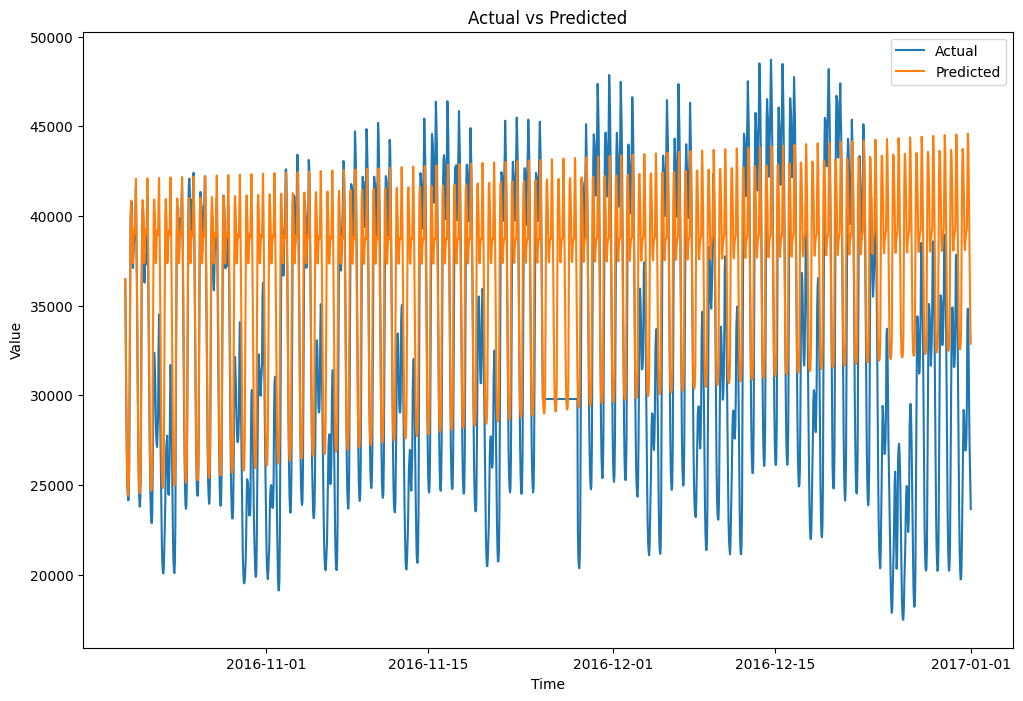

In [78]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(data['utc_timestamp'][train_size:], test, label = 'Actual')
plt.plot(data['utc_timestamp'][train_size:], predictions, label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



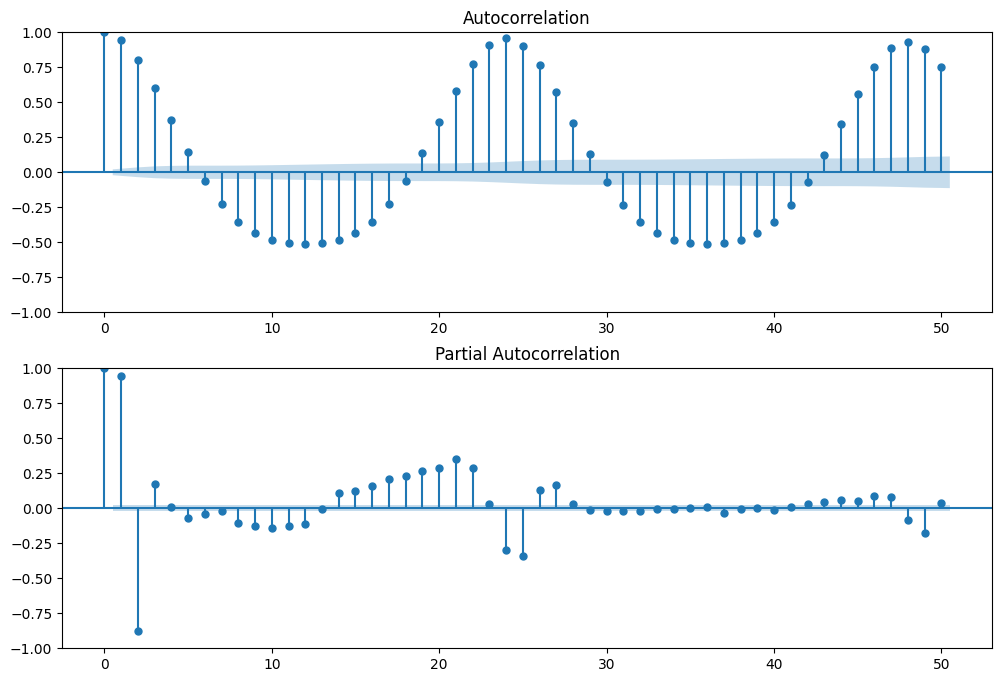

In [79]:
# Plots for 'IT_Solar_Generation'
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (12,8))
plot_acf(data['IT_solar_generation'],lags=50, ax=ax1)
plot_pacf(data['IT_solar_generation'],lags=50, ax=ax2)
plt.show()

In [80]:
'''
Conclusion: # We get the value of p from PACF plot and we get the value of q from ACF plot
# As we can see significant spikes occur upto lag 2 and then they are dropping in PACF. Hence p=2
# As we can see there is no sharp cut but there is a seasonal cyclic pattern indicating that we take q =1 or q =7
'''

'\nConclusion: # We get the value of p from PACF plot and we get the value of q from ACF plot\n# As we can see significant spikes occur upto lag 2 and then they are dropping in PACF. Hence p=2\n# As we can see there is no sharp cut but there is a seasonal cyclic pattern indicating that we take q =1 or q =7\n'

In [81]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# Split the data into  training and testing
train_size = int(len(data)*0.8)
train, test = data['IT_solar_generation'][:train_size], data['IT_solar_generation'][train_size:]


# Fit the ARIMA Model
model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

# Make Predictions on the test data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# ✅ Calculate MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100
print('Test MAPE: %.2f%%' % mape)



Test RMSE: 2486.151
Test MAPE: 543621093513981263872.00%


In [82]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# Split the data into  training and testing
train_size = int(len(data)*0.8)
train, test = data['IT_solar_generation'][:train_size], data['IT_solar_generation'][train_size:]


# Fit the ARIMA Model
model4 = ARIMA(train, order=(2, 0, 7))
model4_fit = model4.fit()

# Make Predictions on the test data
predictions = model4_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# ✅ Calculate MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100
print('Test MAPE: %.2f%%' % mape)

Test RMSE: 2484.253
Test MAPE: 542639801904436346880.00%


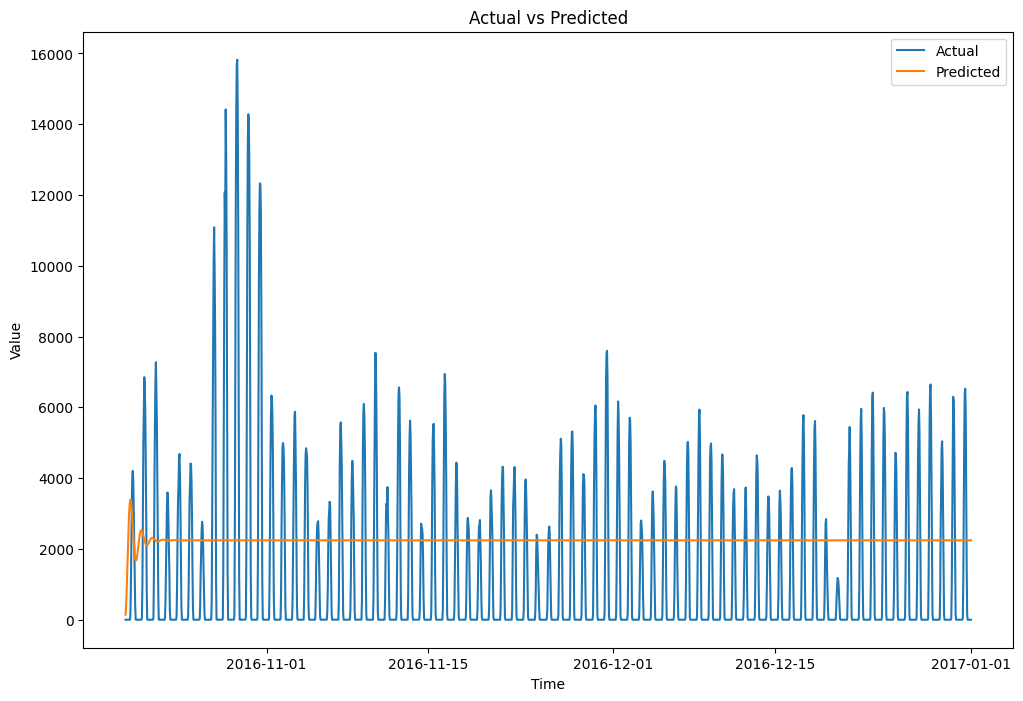

In [83]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(data['utc_timestamp'][train_size:], test, label = 'Actual')
plt.plot(data['utc_timestamp'][train_size:], predictions, label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [84]:
# SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Fit the SARIMA
# Reduced complexity  of seasonal order to address LineAlgError
model5 = SARIMAX(train, seasonal_order=(1, 0, 1, 24))
model5_fit = model5.fit()

# Make Predictions on the test data
predictions = model5_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# ✅ Calculate MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100
print('Test MAPE: %.2f%%' % mape)

Test RMSE: 1379.215
Test MAPE: 3837004905125359104.00%


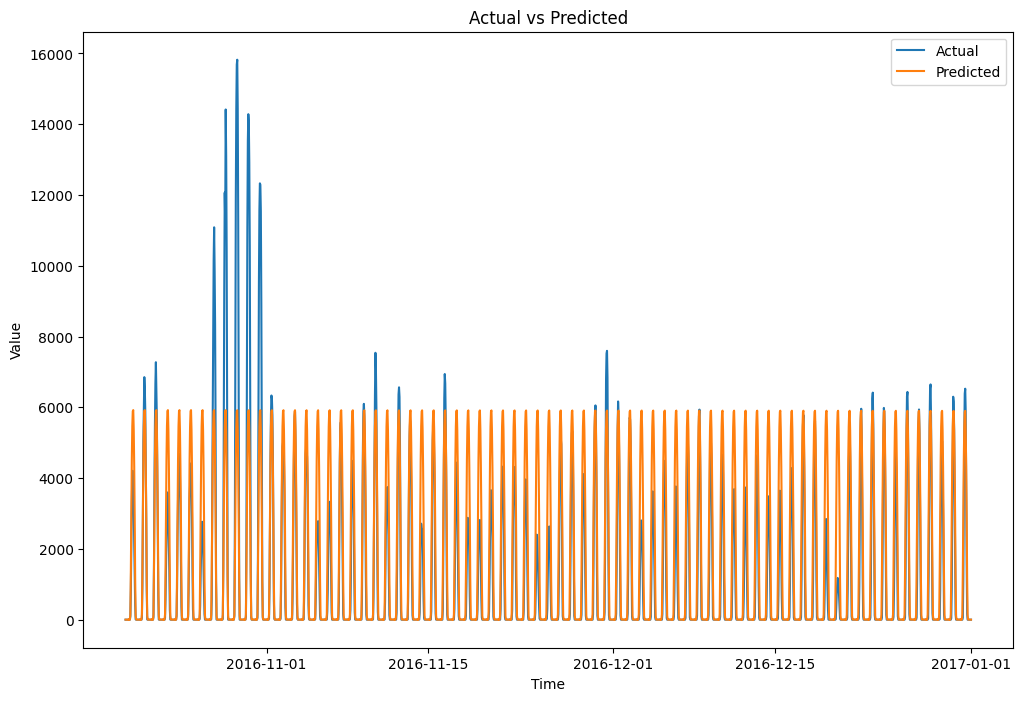

In [85]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(data['utc_timestamp'][train_size:], test, label = 'Actual')
plt.plot(data['utc_timestamp'][train_size:], predictions, label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [86]:
'''
| Model      | RMSE         | Interpretation                                      |
| ---------- | ------------ | --------------------------------------------------- |
| **SARIMA** | **1379.215** | Lower error — better captures **seasonal patterns** |
| **ARIMA**  | 2484.253     | Higher error — likely **misses seasonality**        |

'''

'\n| Model      | RMSE         | Interpretation                                      |\n| ---------- | ------------ | --------------------------------------------------- |\n| **SARIMA** | **1379.215** | Lower error — better captures **seasonal patterns** |\n| **ARIMA**  | 2484.253     | Higher error — likely **misses seasonality**        |\n\n'

In [87]:
'''#homework -> try to use best order  of differencing
# Try to find optimal value of seasonal order
# Try to evaluate all the models by MAPE

#GridSearchCV()'''

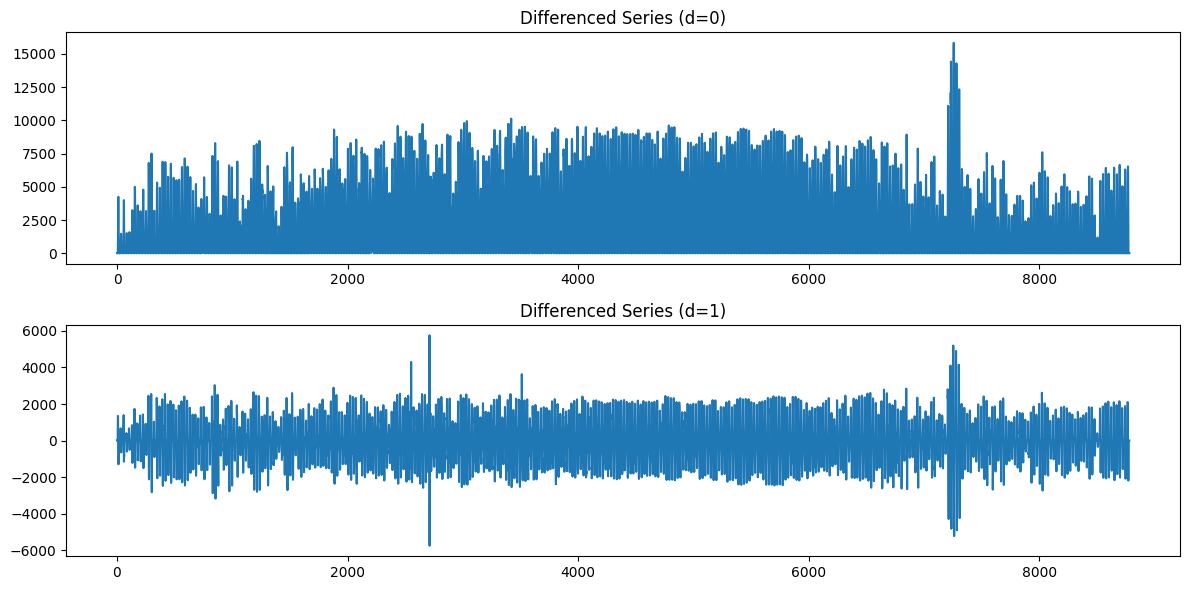

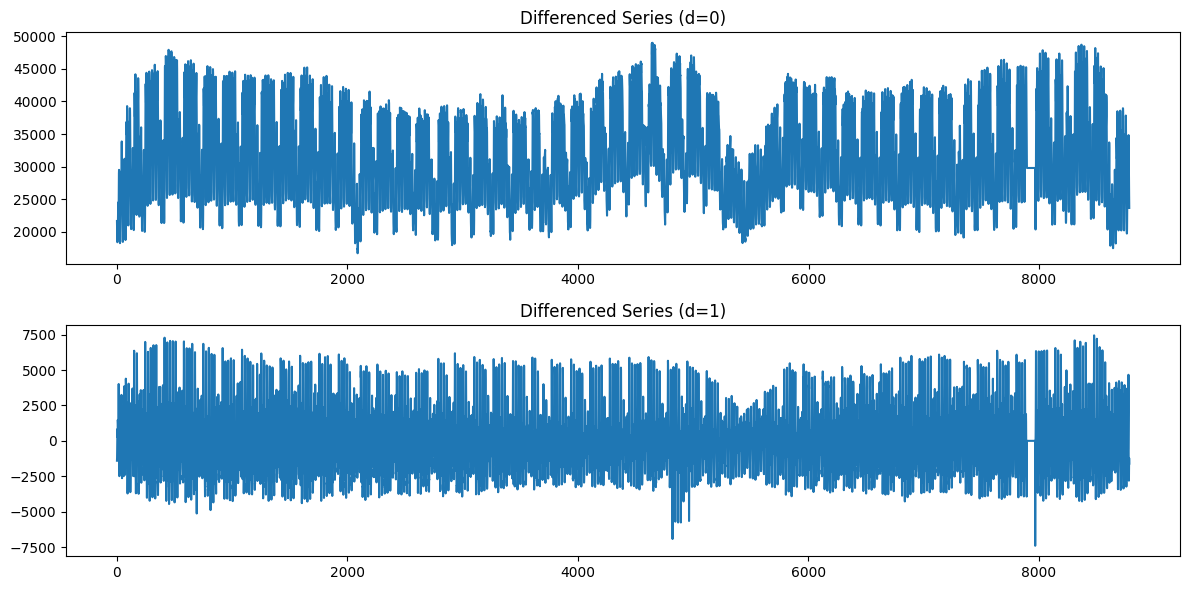

In [88]:
# Use best order of differencing
# Plot original and differenced series
def plot_differencing(series, d):
    plt.figure(figsize=(12, 6))
    for i in range(d+1):
        plt.subplot(d+1, 1, i+1)
        diff_series = series.diff(i).dropna() if i > 0 else series
        diff_series.plot()
        plt.title(f'Differenced Series (d={i})')
        plt.tight_layout()

    plt.show()


plot_differencing(data['IT_solar_generation'], d=1)
plot_differencing(data['IT_load_new'], d=1)

In [89]:
'''Conclusions:
| Variable             | Best Differencing Order (`d`) | Reason                                           |
| -------------------- | ----------------------------- | ------------------------------------------------ |
| **Solar Generation** | `d = 1`                       | Removes trend, makes mean and variance stable    |
| **IT Load**          | `d = 1`                       | Removes seasonality/trend, achieves stationarity |
'''

'Conclusions: \n| Variable             | Best Differencing Order (`d`) | Reason                                           |\n| -------------------- | ----------------------------- | ------------------------------------------------ |\n| **Solar Generation** | `d = 1`                       | Removes trend, makes mean and variance stable    |\n| **IT Load**          | `d = 1`                       | Removes seasonality/trend, achieves stationarity |\n'

In [90]:
# Evaluate all the models by MAPE
from sklearn.metrics import mean_absolute_percentage_error


In [91]:
# Grid Search for ARIMA/SARIMA with MAPE

In [94]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

p_values = range(0, 3)
d_values = [1]
q_values = range(0, 3)

best_score, best_cfg = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p, d, q)).fit()
                predictions = model.predict(start=len(train), end=len(train)+len(test)-1)
                mape = mean_absolute_percentage_error(test, predictions) * 100
                if mape < best_score:
                    best_score, best_cfg = mape, (p, d, q)
                print(f'ARIMA{(p,d,q)} MAPE={mape:.2f}%')
            except:
                continue

print(f'Best ARIMA model: {best_cfg} with MAPE: {best_score:.2f}%')


ARIMA(0, 1, 0) MAPE=32.52%
ARIMA(0, 1, 1) MAPE=29.35%
ARIMA(0, 1, 2) MAPE=26.12%
ARIMA(1, 1, 0) MAPE=21.96%
ARIMA(1, 1, 1) MAPE=22.44%
ARIMA(1, 1, 2) MAPE=22.26%
ARIMA(2, 1, 0) MAPE=22.92%
ARIMA(2, 1, 1) MAPE=25.51%
ARIMA(2, 1, 2) MAPE=24.54%
Best ARIMA model: (1, 1, 0) with MAPE: 21.96%


In [95]:
# Grid Search for SARIMA with MAPE

import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

p_values = range(0, 3)
d_values = [1]
q_values = range(0, 3)

best_score, best_cfg = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = SARIMAX(train, order=(p, d, q)).fit()
                predictions = model.predict(start=len(train), end=len(train)+len(test)-1)
                mape = mean_absolute_percentage_error(test, predictions) * 100
                if mape < best_score:
                    best_score, best_cfg = mape, (p, d, q)
                    print(f'SARIMA{(p,d,q)} MAPE={mape:.2f}%')

            except:
                continue

print(f'Best SARIMA model: {best_cfg} with MAPE: {best_score:.2f}%')


SARIMA(0, 1, 0) MAPE=32.52%
SARIMA(0, 1, 1) MAPE=29.35%
SARIMA(0, 1, 2) MAPE=26.12%
SARIMA(1, 1, 0) MAPE=21.96%
Best SARIMA model: (1, 1, 0) with MAPE: 21.96%
